<a href="https://colab.research.google.com/github/blessingitodo/Covid19-Data-Analysis/blob/main/Final_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ipympl mplcursors datetime seaborn plotly numpy matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vaccination_data.csv to vaccination_data.csv
Saving covid19_global_data.csv to covid19_global_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime

In [ ]:
covid19_global_data = pd.read_csv("covid19_global_data.csv")
vaccination_data = pd.read_csv("vaccination_data.csv")

In [ ]:
covid19_global_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [ ]:
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


In [ ]:
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='Cura�ao', repl='Curacao', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='C�te d\'Ivoire', repl='Cote d\'Ivoire', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='R�union', repl='Reunion', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='Saint Barth�lemy', repl='Saint Barthelemy', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='T�rkiye', repl='Turkiye', regex=False)

In [ ]:
covid19_global_data.loc[[12194, 13047, 45247, 46321, 56151]]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
12194,2020-01-19,CI,Cote d'Ivoire,AFRO,NaN,0,NaN,0
13047,2021-10-17,CW,Curacao,AMRO,181.0,16885,1.0,169
45247,2020-09-06,RE,Reunion,NaN,558.0,2115,3.0,6
46321,2021-10-17,BL,Saint Barthelemy,NaN,1.0,1659,0.0,4
56151,2020-05-03,TR,Turkiye,EURO,16602.0,124375,630.0,3336


In [ ]:
who_region_mapping = {'Falkland Islands (Malvinas)': 'AMRO', 'Faroe Islands': 'EURO', 'French Guiana': 'AMRO', 'Gibraltar': 'EURO','Guadeloupe': 'AMRO',
    'Guernsey': 'EURO', 'Holy See': 'EURO', 'Isle of Man': 'EURO', 'Jersey': 'EURO', 'Liechtenstein': 'EURO', 'Martinique': 'AMRO','Mayotte': 'AFRO',
    'Pitcairn': 'WPRO', 'Reunion': 'AFRO', 'Saint Barthelemy': 'AMRO', 'Saint Helena': 'AFRO', 'Saint Martin (French part)': 'AMRO', 'Saint Pierre and Miquelon': 'AMRO'}
covid19_global_data.loc[pd.isna(covid19_global_data['WHO_region']), 'WHO_region'] = covid19_global_data['Country'].map(who_region_mapping)

covid19_global_data[covid19_global_data['Country'] == 'Reunion']

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
45212,2020-01-05,RE,Reunion,AFRO,NaN,0,NaN,0
45213,2020-01-12,RE,Reunion,AFRO,NaN,0,NaN,0
45214,2020-01-19,RE,Reunion,AFRO,NaN,0,NaN,0
45215,2020-01-26,RE,Reunion,AFRO,NaN,0,NaN,0
45216,2020-02-02,RE,Reunion,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
45461,2024-10-13,RE,Reunion,AFRO,NaN,494595,NaN,921
45462,2024-10-20,RE,Reunion,AFRO,NaN,494595,NaN,921
45463,2024-10-27,RE,Reunion,AFRO,NaN,494595,NaN,921
45464,2024-11-03,RE,Reunion,AFRO,NaN,494595,NaN,921


In [ ]:
covid19_global_data = covid19_global_data.fillna(0)

In [ ]:
drop_columns = ['Country_code', 'New_cases', 'New_deaths']
covid19_global_data = covid19_global_data.drop(labels=drop_columns, axis=1)
column_mapper = {'Date_reported': 'Date'}
covid19_global_data = covid19_global_data.rename(mapper=column_mapper, axis=1)

In [ ]:
covid19_global_data['Date'] = pd.to_datetime(covid19_global_data['Date'], format='%Y-%m-%d')

In [ ]:
covid19_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               60960 non-null  datetime64[ns]
 1   Country            60960 non-null  object        
 2   WHO_region         60960 non-null  object        
 3   Cumulative_cases   60960 non-null  int64         
 4   Cumulative_deaths  60960 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
covid19_global_data['Cumulative_recovered'] = covid19_global_data['Cumulative_cases'] - covid19_global_data['Cumulative_deaths']

In [ ]:
countrywise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='Country', aggfunc=max)

<ipython-input-15-aa2cbecc06f5>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  countrywise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='Country', aggfunc=max)


In [ ]:
countrywise['Recovery_rate'] = countrywise['Cumulative_recovered']*100/countrywise['Cumulative_cases']

In [ ]:
countrywise['Death_rate'] = countrywise['Cumulative_deaths']*100/countrywise['Cumulative_cases']

In [ ]:
countrywise = countrywise.sort_values(by='Cumulative_cases', ascending=False)

In [ ]:
countrywise.style.background_gradient(cmap='cubehelix')

,Cumulative_cases,Cumulative_deaths,Cumulative_recovered,Recovery_rate,Death_rate
Country,,,,,
United States of America,103436829,1207479,102309677,98.910299,1.167359
China,99381189,122375,99258814,99.876863,0.123137
India,45044346,533655,44510691,98.815268,1.184732
France,39027283,168091,38859192,99.569299,0.430701
Germany,38437756,174979,38262777,99.544773,0.455227
Brazil,37511921,702116,36809805,98.128286,1.871714
Republic of Korea,34571873,35934,34535939,99.896060,0.103940
Japan,33803572,74694,33728878,99.779035,0.220965
Italy,26826486,197542,26628944,99.263631,0.736369


In [ ]:
regionwise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='WHO_region', aggfunc=max)

<ipython-input-20-0002213396ed>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  regionwise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='WHO_region', aggfunc=max)


In [ ]:
regionwise['Recovery_rate'] = regionwise['Cumulative_recovered']*100/regionwise['Cumulative_cases']

In [ ]:
regionwise['Death_rate'] = regionwise['Cumulative_deaths']*100/regionwise['Cumulative_cases']

In [ ]:
regionwise = regionwise.sort_values(by='Cumulative_cases', ascending=False)

In [ ]:


regionwise.style.background_gradient(cmap='cubehelix')

,Cumulative_cases,Cumulative_deaths,Cumulative_recovered,Recovery_rate,Death_rate
WHO_region,,,,,
AMRO,103436829,1207479,102309677,98.910299,1.167359
WPRO,99381189,122375,99258814,99.876863,0.123137
SEARO,45044346,533655,44510691,98.815268,1.184732
EURO,39027283,403672,38859192,99.569299,1.034333
EMRO,7627863,146837,7481026,98.074992,1.925008
AFRO,4072819,102595,3970224,97.480983,2.519017
OTHER,712,13,705,99.016854,1.825843


<ipython-input-25-1dc742f4862e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=4, edgecolor='blue')
<ipython-input-25-1dc742f4862e>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


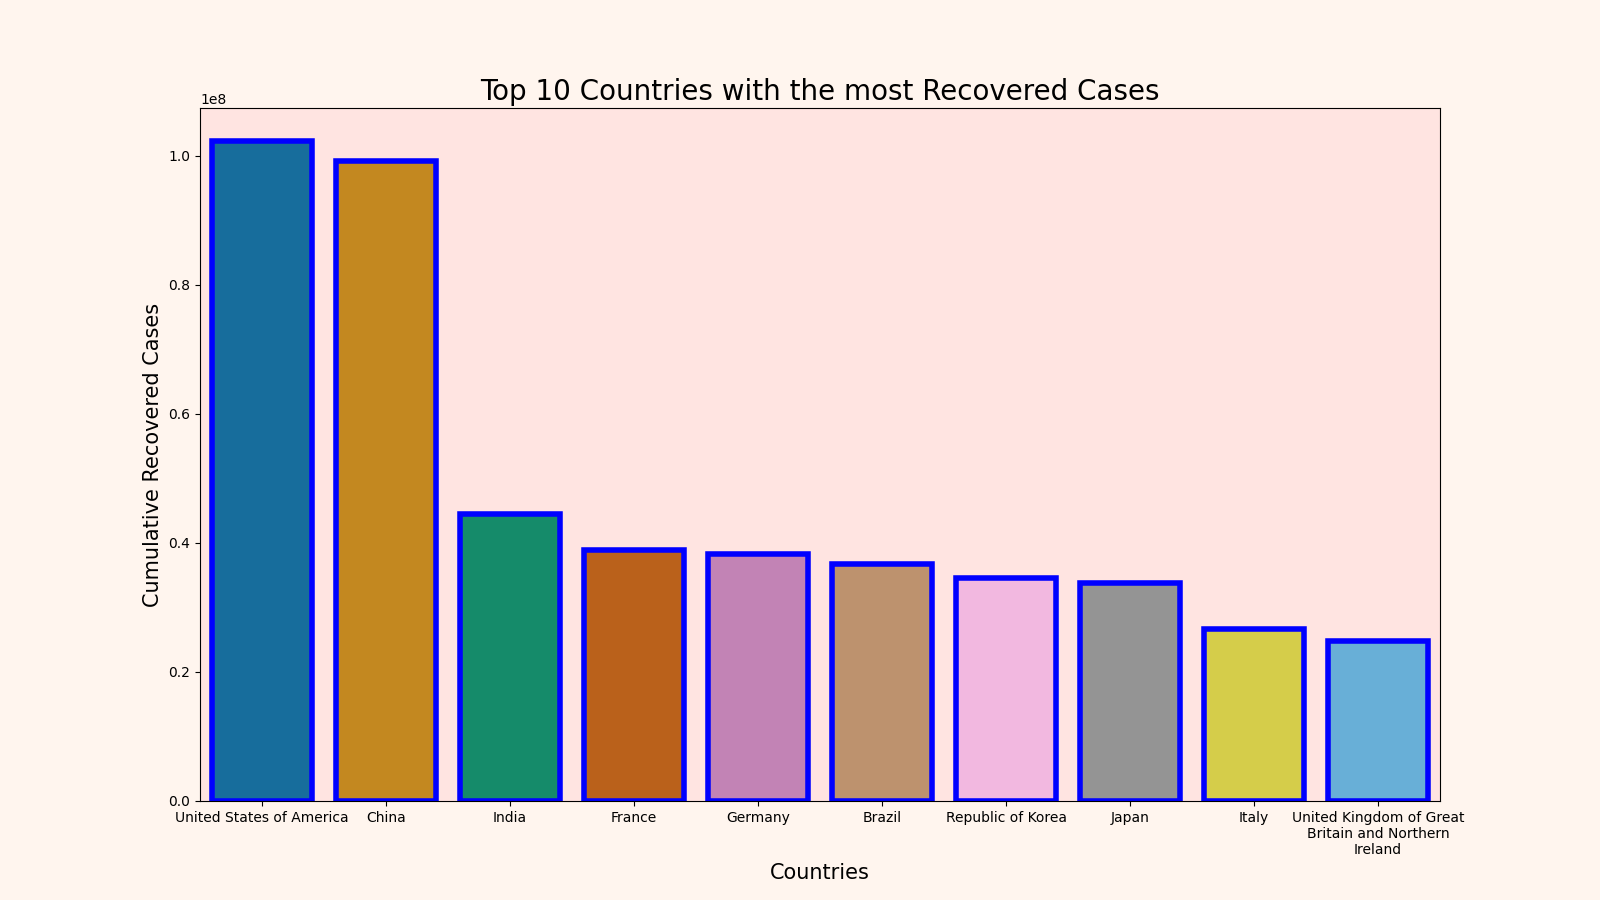

In [ ]:

!pip install ipympl
%matplotlib widget
import textwrap
import mplcursors
from google.colab import output
output.enable_custom_widget_manager()

# Top 10 recovered cases
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('seashell')
plt.title('Top 10 Countries with the most Recovered Cases', size=20)

top_10_recovered = covid19_global_data.groupby(by='Country').max()[['Cumulative_recovered', 'Date']].sort_values(by='Cumulative_recovered', ascending=False).reset_index()

axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=4, edgecolor='blue')
axis.set_facecolor('mistyrose')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Recovered Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

bars = axis.patches
cursor = mplcursors.cursor(bars, hover=True)

@cursor.connect("add")
def on_add(sel):
    bar_index = next((i for i, bar in enumerate(bars) if bar == sel.artist), None)
    if bar_index is not None:
        country = top_10_recovered.iloc[bar_index]['Country']
        recovered = top_10_recovered.iloc[bar_index]['Cumulative_recovered']
        sel.annotation.set_text(f"{country}: {recovered:,} recovered")
    else:
        sel.annotation.set_text("Unknown")

plt.show()

<ipython-input-26-635e60ac066a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_deaths', x='Country', palette='colorblind', linewidth=2, edgecolor='red')
<ipython-input-26-635e60ac066a>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


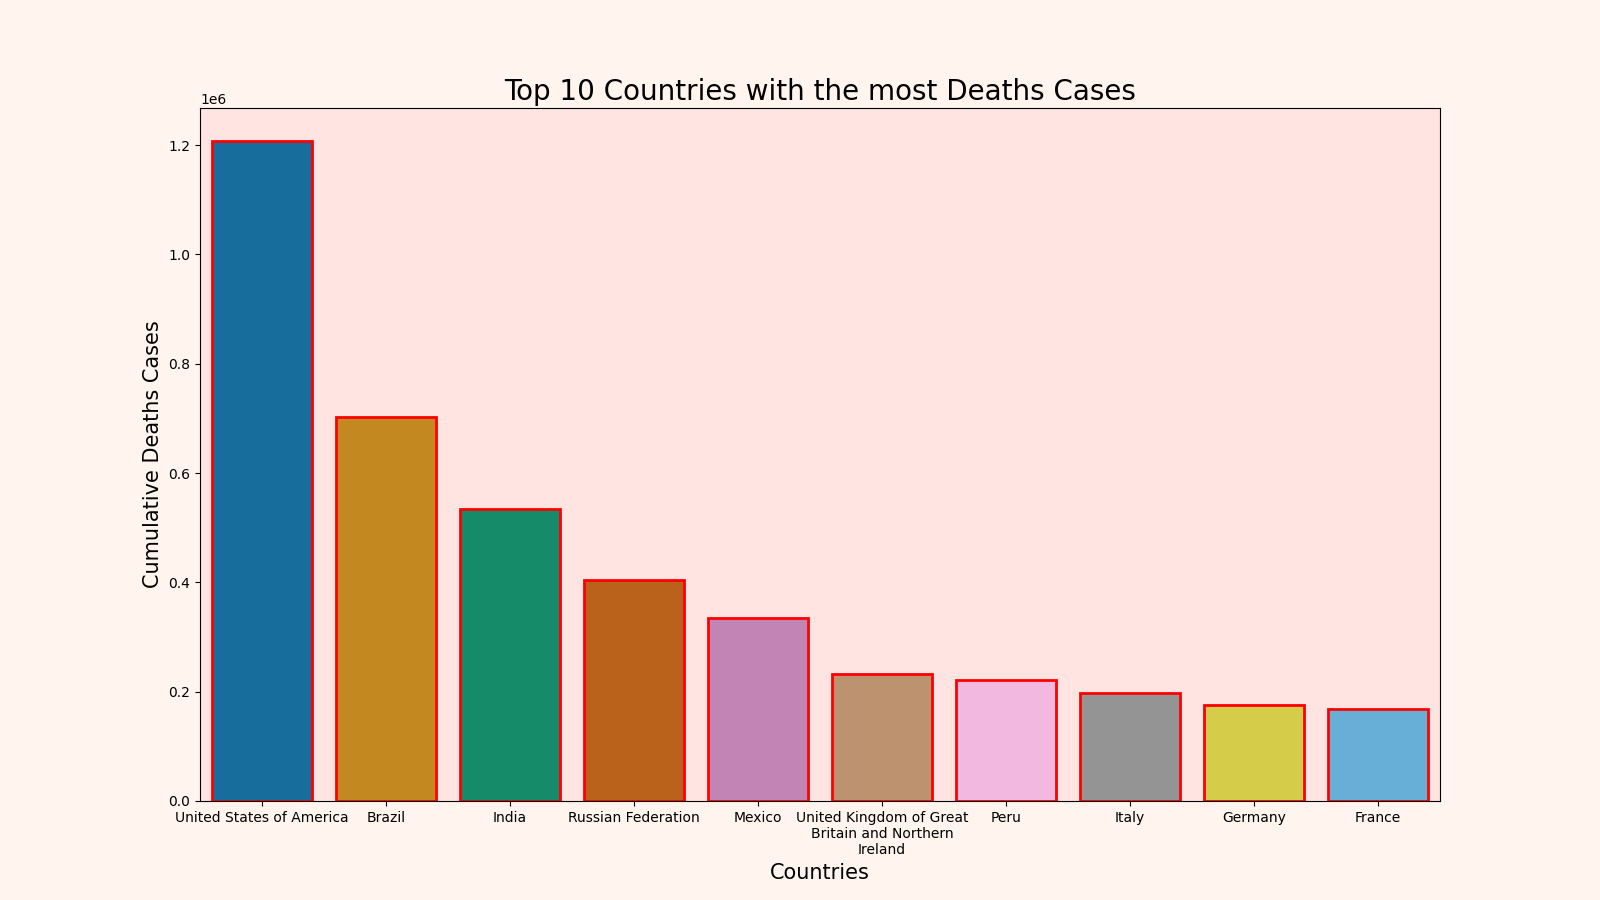

In [ ]:
# Top 10 deaths cases
%matplotlib widget
fig=plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('seashell')
plt.title('Top 10 Countries with the most Deaths Cases', size=20)
top_10_deaths = covid19_global_data.groupby(by='Country').max()[['Cumulative_deaths', 'Date']].sort_values(by='Cumulative_deaths', ascending=False).reset_index()

axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_deaths', x='Country', palette='colorblind', linewidth=2, edgecolor='red')
axis.set_facecolor('mistyrose')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Deaths Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

bars = axis.patches
cursor = mplcursors.cursor(bars, hover=True)
@cursor.connect("add")
def on_add(sel):
    bar_index = next((i for i, bar in enumerate(bars) if bar == sel.artist), None)
    if bar_index is not None:
        country = top_10_deaths.iloc[bar_index]['Country']
        deaths = top_10_deaths.iloc[bar_index]['Cumulative_deaths']
        sel.annotation.set_text(f"{country}: {deaths:,} deaths")
    else:
        sel.annotation.set_text("Unknown")


plt.show()

<ipython-input-27-6d601f85e9ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.barplot(data=top_10_cases.iloc[:10], y='Cumulative_cases', x='Country', palette='colorblind', linewidth=2, edgecolor='seagreen')
<ipython-input-27-6d601f85e9ed>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


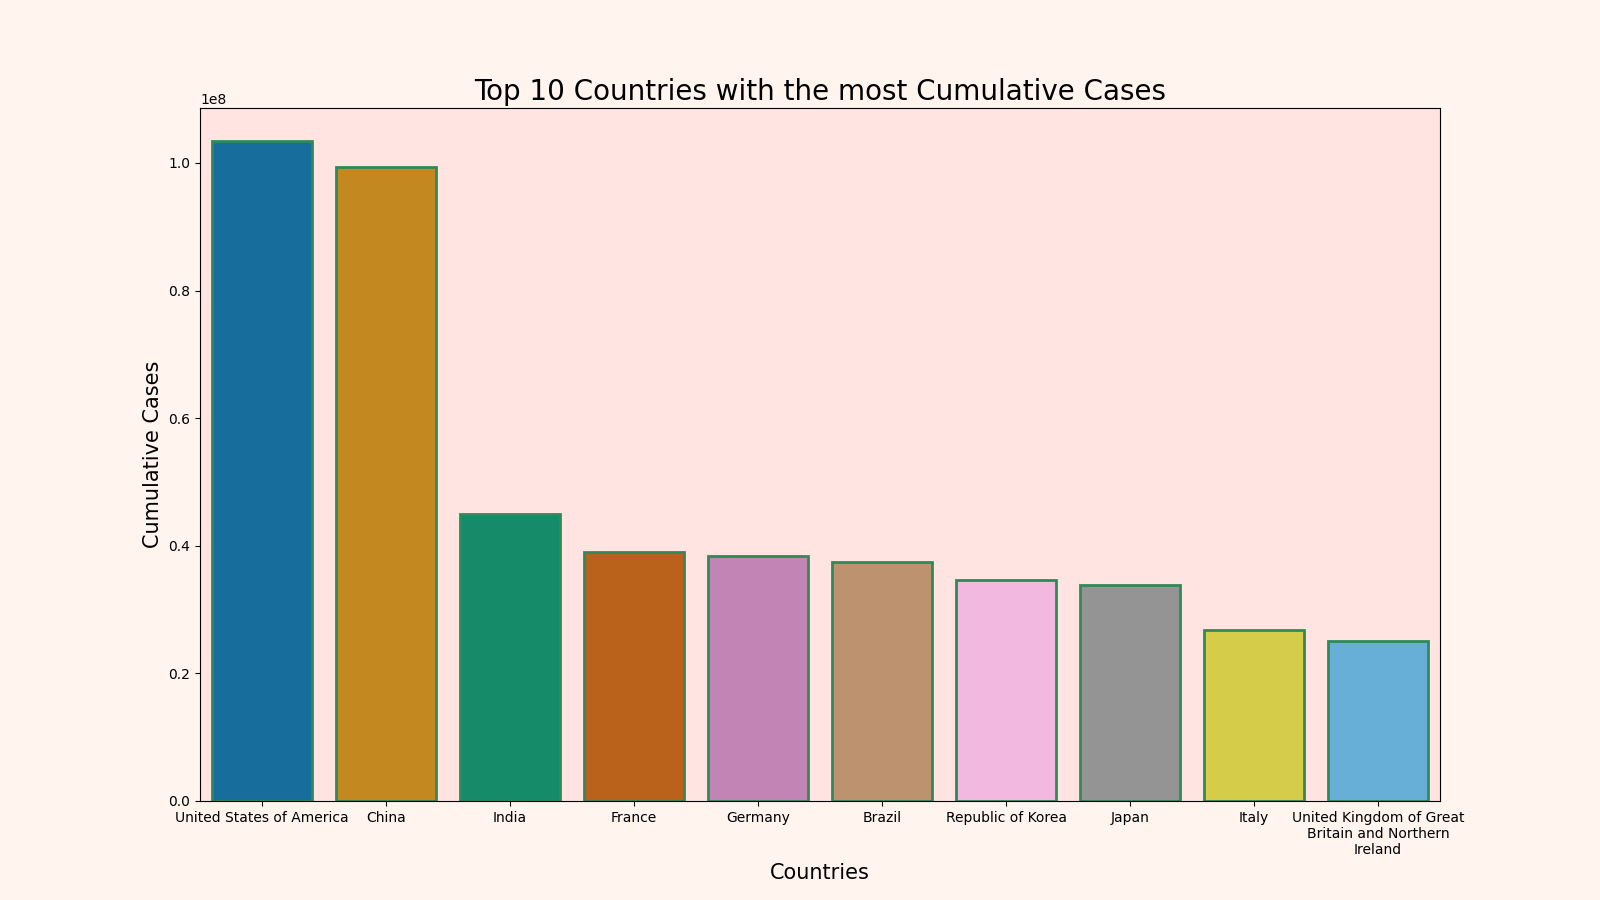

In [ ]:
# Top 10 Cumulative_cases
fig=plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('seashell')
plt.title('Top 10 Countries with the most Cumulative Cases', size=20)
top_10_cases = covid19_global_data.groupby(by='Country').max()[['Cumulative_cases', 'Date']].sort_values(by='Cumulative_cases', ascending=False).reset_index()

axis=sns.barplot(data=top_10_cases.iloc[:10], y='Cumulative_cases', x='Country', palette='colorblind', linewidth=2, edgecolor='seagreen')
axis.set_facecolor('mistyrose')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

bars = axis.patches
cursor = mplcursors.cursor(bars, hover=True)
@cursor.connect("add")
def on_add(sel):
    bar_index = next((i for i, bar in enumerate(bars) if bar == sel.artist), None)
    if bar_index is not None:
        country = top_10_cases.iloc[bar_index]['Country']
        cases = top_10_cases.iloc[bar_index]['Cumulative_cases']
        sel.annotation.set_text(f"{country}: {cases:,} cases")
    else:
        sel.annotation.set_text("Unknown")


plt.show()

In [ ]:
import matplotlib.dates as mdates

# Growth Trend for top 10 Countries with the most Cases

top_10_cases = covid19_global_data.groupby(by='Country').max()[['Cumulative_cases', 'Date']].sort_values(by='Cumulative_cases', ascending=False).reset_index()
top_countries = ['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil', 'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northern Ireland']
plot_data = covid19_global_data[covid19_global_data['Country'].isin(top_countries)]

fig = go.Figure()

for country in top_countries:
    country_data = plot_data[plot_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Cumulative_cases'],
            mode='lines',
            name=country,
            hovertemplate=(
                f"<b>{country}</b><br>"
                "Date: %{x|%Y-%m-%d}<br>"
                "Cumulative Cases: %{y:,}<extra></extra>"
            )
        )
    )

# Update layout
fig.update_layout(
    title={
        'text': "Growth Trend for Top 10 Countries with the Most Cases",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title="Date",
    yaxis_title="Cumulative Cases",
    xaxis=dict(
        tickformat='%Y-%m',
        tickangle=45,
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    legend=dict(
        title="Countries",
        font=dict(size=12)
    ),
    plot_bgcolor="mistyrose",
    paper_bgcolor="seashell",
    hovermode="x unified",
    height=600,
    width=1000
)


fig.show()


In [ ]:
# Growth Trend for top 10 Countries with the most Death Cases

top_deaths = ['United States of America', 'Brazil', 'India', 'Russian Federation', 'Mexico', 'United Kingdom of Great Britain and Northan Ireland', 'Peru', 'Italy', 'Germany', 'France']
plot_data = covid19_global_data[covid19_global_data['Country'].isin(top_deaths)]
fig = go.Figure()

for country in top_deaths:
    country_data = plot_data[plot_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Cumulative_deaths'],
            mode='lines',
            name=country,
            hovertemplate=(
                f"<b>{country}</b><br>"
                "Date: %{x|%Y-%m-%d}<br>"
                "Cumulative Deaths: %{y:,}<extra></extra>")))
fig.update_layout(
    title={
        'text': "Growth Trend for Top 10 Countries with the Highest Death Cases",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title="Date",
    yaxis_title="Cumulative Death Cases",
    xaxis=dict(
        tickformat='%Y-%m',
        tickangle=45,
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    legend=dict(
        title="Countries",
        font=dict(size=12)
    ),
    plot_bgcolor="mistyrose",
    paper_bgcolor="seashell",
    hovermode="x unified",
    height=600,
    width=1000
)

fig.show()

In [ ]:
# Growth Trend for top 10 Countries with the most Recovered Cases

top_recovered = ['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil', 'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northan Ireland']
data = covid19_global_data[covid19_global_data['Country'].isin(top_recovered)]
fig = go.Figure()

for country in top_recovered:
    country_data = plot_data[plot_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Cumulative_recovered'],
            mode='lines',
            name=country,
            hovertemplate=(
                f"<b>{country}</b><br>"
                "Date: %{x|%Y-%m-%d}<br>"
                "Cumulative Recovered: %{y:,}<extra></extra>")))

fig.update_layout(
    title={
        'text': "Growth Trend for Top 10 Countries with the Highest Recovered Cases",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title="Date",
    yaxis_title="Cumulative Recovered Cases",
    xaxis=dict(
        tickformat='%Y-%m',
        tickangle=45,
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title_font=dict(size=15),
        gridcolor='lightgrey'
    ),
    legend=dict(
        title="Countries",
        font=dict(size=12)
    ),
    plot_bgcolor="mistyrose",
    paper_bgcolor="seashell",
    hovermode="x unified",
    height=600,
    width=1000
)

fig.show()

In [ ]:
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


In [ ]:
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='Cura�ao', repl='Curacao', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='C�te d\'Ivoire', repl='Cote d\'Ivoire', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='R�union', repl='Reunion', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='Saint Barth�lemy', repl='Saint Barthelemy', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='T�rkiye', repl='Turkiye', regex=False)

In [ ]:
vaccination_data.loc[[30, 39, 147]]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
30,Cote d'Ivoire,CIV,AFRO,REPORTING,2023-12-31,25263932.0,13568372.0,96.0,51.0,12164304.0,46.0,NaN,2021-03-01,NaN,3138712.0,12.0
39,Curacao,CUW,AMRO,REPORTING,2023-12-29,260324.0,108601.0,159.0,66.0,100885.0,61.0,NaN,NaN,NaN,47473.0,29.0
147,Turkiye,TUR,EURO,REPORTING,2023-12-23,152475057.0,57936783.0,181.0,69.0,53171790.0,63.0,NaN,NaN,NaN,27896331.0,33.0


In [ ]:
vaccination_data.isnull().sum()

,0
COUNTRY,0
ISO3,0
WHO_REGION,6
DATA_SOURCE,0
DATE_UPDATED,7
TOTAL_VACCINATIONS,6
PERSONS_VACCINATED_1PLUS_DOSE,6
TOTAL_VACCINATIONS_PER100,8
PERSONS_VACCINATED_1PLUS_DOSE_PER100,8
PERSONS_LAST_DOSE,6


In [ ]:
drop_columns = ['VACCINES_USED', 'NUMBER_VACCINES_TYPES_USED']
vaccination_data = vaccination_data.drop(labels=drop_columns, axis=1)

In [ ]:
who_region_mapping = {'Guadeloupe': 'AMRO', 'French Guiana': 'AMRO', 'Gibraltar': 'EURO', 'Liechtenstein': 'EURO', 'Saint Helena': 'AFRO', 'Taiwan, China': 'WPRO'}
vaccination_data.loc[pd.isna(vaccination_data['WHO_REGION']), 'WHO_REGION'] = vaccination_data['COUNTRY'].map(who_region_mapping)

In [ ]:
vaccination_data = vaccination_data.dropna(subset=['TOTAL_VACCINATIONS'])

In [ ]:
vaccination_data['TOTAL_VACCINATIONS_PER100'] = vaccination_data['TOTAL_VACCINATIONS_PER100'].fillna(0)
vaccination_data['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] = vaccination_data['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].fillna(0)
vaccination_data['PERSONS_LAST_DOSE_PER100'] = vaccination_data['PERSONS_LAST_DOSE_PER100'].fillna(0)
vaccination_data['PERSONS_BOOSTER_ADD_DOSE'] = vaccination_data['PERSONS_BOOSTER_ADD_DOSE'].fillna(0)
vaccination_data['PERSONS_BOOSTER_ADD_DOSE_PER100'] = vaccination_data['PERSONS_BOOSTER_ADD_DOSE_PER100'].fillna(0)

In [ ]:
vaccination_data = vaccination_data.dropna(subset=['FIRST_VACCINE_DATE'])

In [ ]:
vaccination_data.isnull().sum()

,0
COUNTRY,0
ISO3,0
WHO_REGION,0
DATA_SOURCE,0
DATE_UPDATED,0
TOTAL_VACCINATIONS,0
PERSONS_VACCINATED_1PLUS_DOSE,0
TOTAL_VACCINATIONS_PER100,0
PERSONS_VACCINATED_1PLUS_DOSE_PER100,0
PERSONS_LAST_DOSE,0


In [ ]:
regionwise_vaccines = pd.pivot_table(vaccination_data, values=['TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE_PER100', 'PERSONS_BOOSTER_ADD_DOSE_PER100'], index='WHO_REGION', aggfunc=np.mean)

<ipython-input-41-6525ddf54582>:1: FutureWarning:

The provided callable <function mean at 0x7f1bdb5a1bd0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [ ]:
regionwise_vaccines = regionwise_vaccines.sort_values(by='TOTAL_VACCINATIONS_PER100', ascending=False)

In [ ]:
regionwise_vaccines.style.background_gradient(cmap='cubehelix')


,PERSONS_BOOSTER_ADD_DOSE_PER100,PERSONS_LAST_DOSE_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,TOTAL_VACCINATIONS_PER100
WHO_REGION,,,,
WPRO,47.000000,77.620690,81.172414,225.827586
SEARO,37.100000,73.600000,80.800000,191.300000
EURO,42.000000,62.490196,65.196078,181.176471
AMRO,28.525000,62.375000,68.650000,168.200000
EMRO,14.750000,45.350000,51.850000,105.300000
AFRO,8.630435,36.391304,42.826087,71.434783


In [ ]:
first_dose = vaccination_data['PERSONS_VACCINATED_1PLUS_DOSE'].sum()
last_dose = vaccination_data['PERSONS_LAST_DOSE'].sum()
booster_dose = vaccination_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

px.pie(names=['First Dose', 'Second Dose', 'Booster Shot'], values=[first_dose, last_dose, booster_dose], hole=0.5, width=1000, height=800, title='Vaccination Breakdown')

<ipython-input-45-814f7198288f>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-45-814f7198288f>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



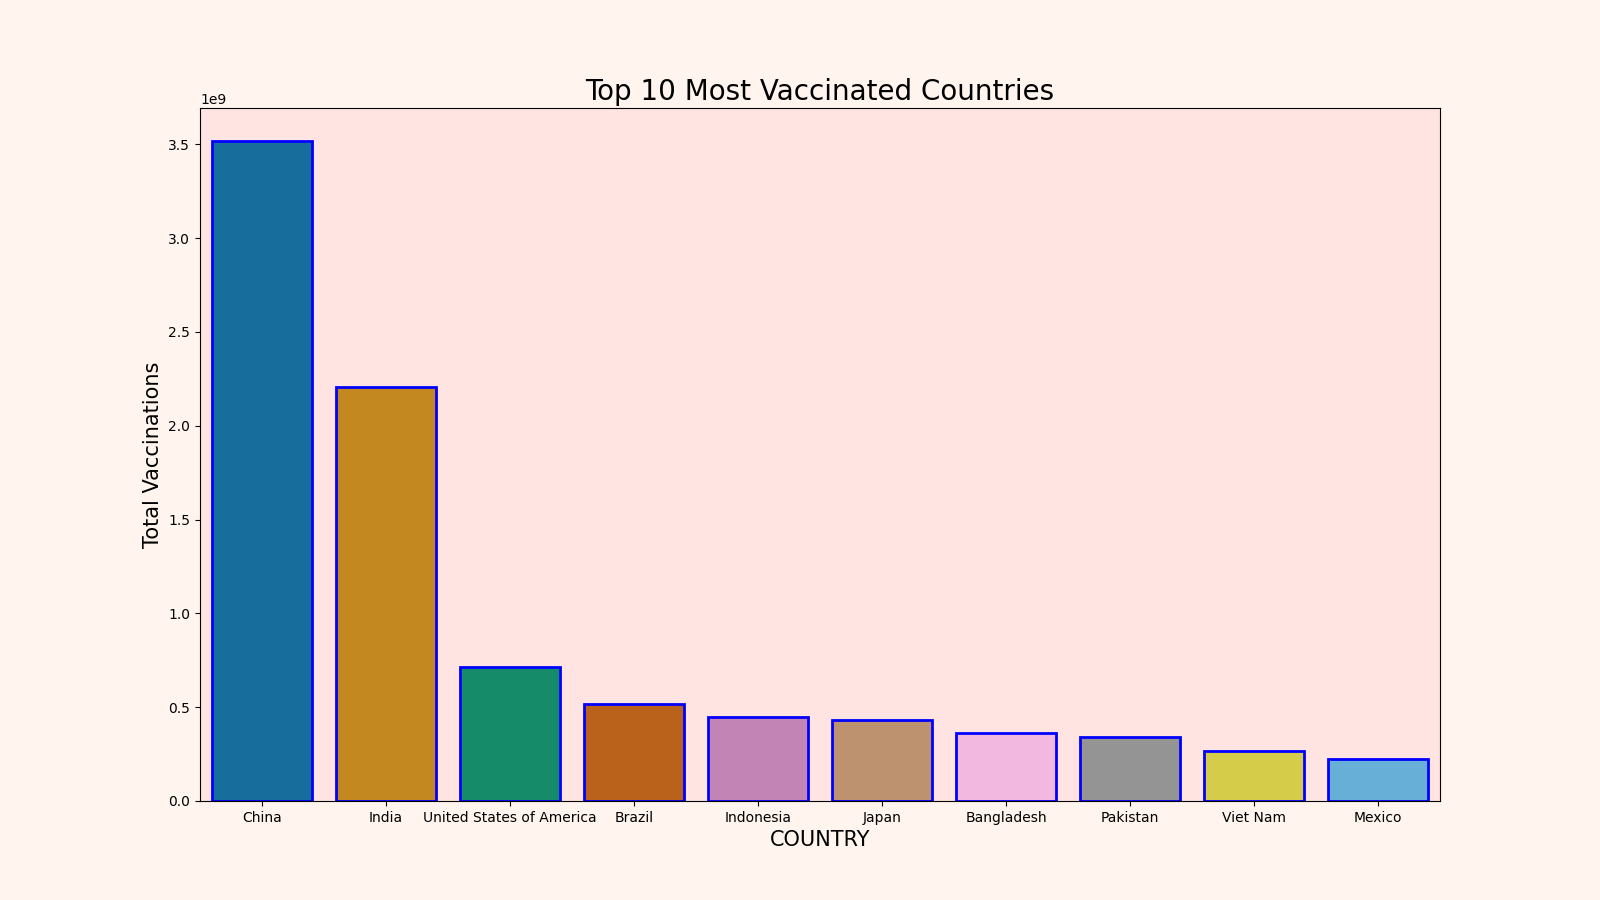

In [ ]:
# Top 10 Most vacinated countries

fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('seashell')
plt.title('Top 10 Most Vaccinated Countries', size=20)

top_10_vaccinated = vaccination_data.sort_values(by='TOTAL_VACCINATIONS', ascending=False)[:10]
axis = sns.barplot(data=top_10_vaccinated, y='TOTAL_VACCINATIONS', x='COUNTRY', palette='colorblind', linewidth=2, edgecolor='blue')
axis.set_facecolor('mistyrose')

plt.xlabel('COUNTRY', size=15)
plt.ylabel('Total Vaccinations', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

bars = axis.patches
cursor = mplcursors.cursor(bars, hover=True)

def on_add(sel):
    bar_index = bars.index(sel.artist)
    country = top_10_vaccinated.iloc[bar_index]['COUNTRY']
    vaccinated = top_10_vaccinated.iloc[bar_index]['TOTAL_VACCINATIONS']
    sel.annotation.set_text(f"{country}: {vaccinated:,} vaccinated")

cursor.connect("add", on_add)

plt.show()

<ipython-input-46-0a93bcd742ed>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-0a93bcd742ed>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-0a93bcd742ed>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-0a93bcd742ed>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




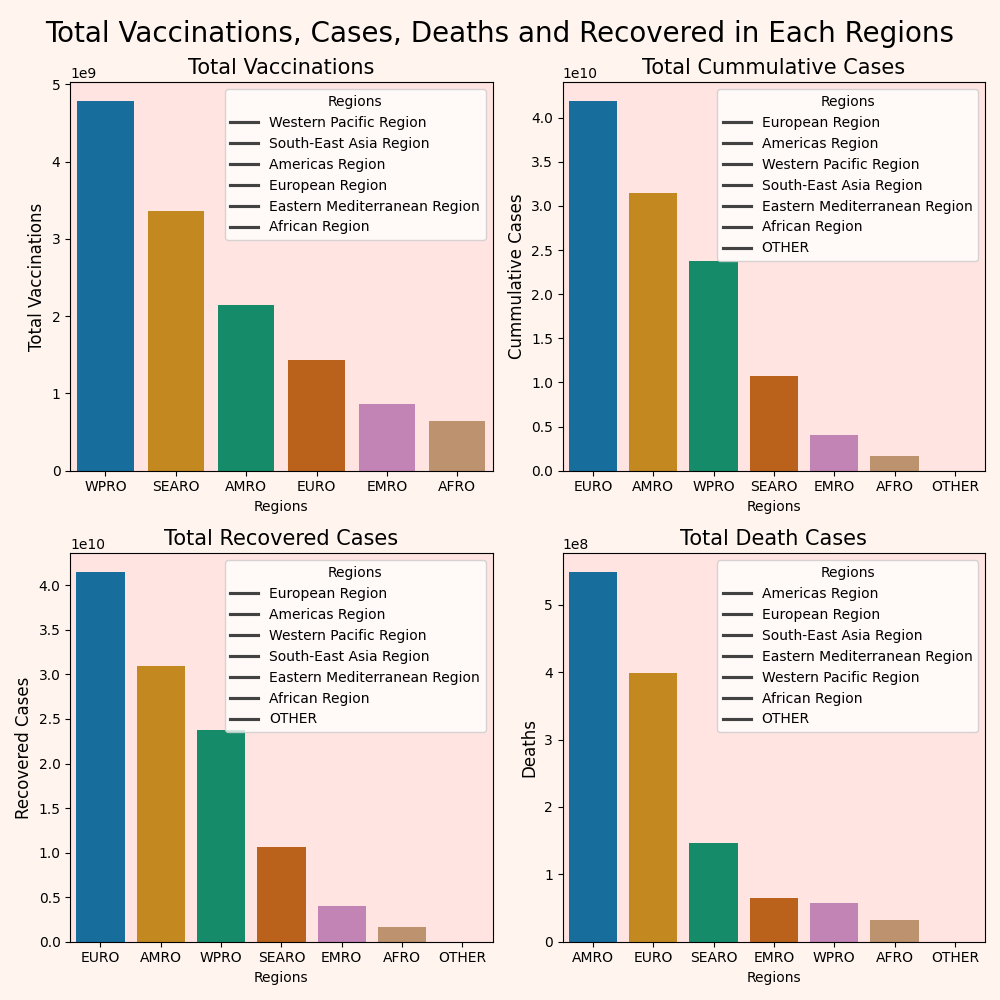

In [ ]:
# total vaccinations
vaccination_regions = vaccination_data.groupby(by='WHO_REGION').sum()['TOTAL_VACCINATIONS'].sort_values(ascending=False).reset_index()
# Cumulative_cases in each region
region_cases = covid19_global_data.groupby(by='WHO_region')['Cumulative_cases'].sum().sort_values(ascending=False).reset_index()
# recoved_cases in each region
region_recovered = covid19_global_data.groupby(by='WHO_region')['Cumulative_recovered'].sum().sort_values(ascending=False).reset_index()
# death_cases in each region
region_deaths = covid19_global_data.groupby(by='WHO_region')['Cumulative_deaths'].sum().sort_values(ascending=False).reset_index()

region_full_names = {'WPRO': 'Western Pacific Region', 'SEARO': 'South-East Asia Region', 'AMRO': 'Americas Region', 'EURO': 'European Region', 'EMRO': 'Eastern Mediterranean Region', 'AFRO': 'African Region'}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.patch.set_facecolor('seashell')
plt.suptitle('Total Vaccinations, Cases, Deaths and Recovered in Each Regions', size=20)

axis1 = sns.barplot(data=vaccination_regions, y='TOTAL_VACCINATIONS', x='WHO_REGION', palette='colorblind', linewidth=2, ax=axes[0, 0])
axes[0, 0].set_title('Total Vaccinations', size=15)
axes[0, 0].set_xlabel('Regions', size=10)
axes[0, 0].set_ylabel('Total Vaccinations', size=12)
axes[0, 0].set_facecolor('mistyrose')
axes[0, 0].legend([region_full_names.get(region, region) for region in vaccination_regions['WHO_REGION']], loc='upper right', title="Regions")

axis2 = sns.barplot(data=region_cases, y='Cumulative_cases', x='WHO_region', palette='colorblind', linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Total Cummulative Cases', size=15)
axes[0, 1].set_xlabel('Regions', size=10)
axes[0, 1].set_ylabel('Cummulative Cases', size=12)
axes[0, 1].set_facecolor('mistyrose')
# axes[0, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axes[0, 1].legend([region_full_names.get(region, region) for region in region_cases['WHO_region']], loc='upper right', title="Regions")

axis3 = sns.barplot(data=region_recovered, y='Cumulative_recovered', x='WHO_region', palette='colorblind', linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title('Total Recovered Cases', size=15)
axes[1, 0].set_xlabel('Regions', size=10)
axes[1, 0].set_ylabel('Recovered Cases', size=12)
axes[1, 0].set_facecolor('mistyrose')
axes[1, 0].legend([region_full_names.get(region, region) for region in region_recovered['WHO_region']], loc='upper right', title="Regions")

axis4 = sns.barplot(data=region_deaths, y='Cumulative_deaths', x='WHO_region', palette='colorblind', linewidth=2, ax=axes[1, 1])
axes[1, 1].set_title('Total Death Cases', size=15)
axes[1, 1].set_xlabel('Regions', size=10)
axes[1, 1].set_ylabel('Deaths', size=12)
axes[1, 1].set_facecolor('mistyrose')
axes[1, 1].legend([region_full_names.get(region, region) for region in region_deaths['WHO_region']], loc='upper right', title="Regions")

for ax in axes.flatten():
    cursor = mplcursors.cursor(ax.patches, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(f"{sel.artist.get_height():,.0f}")
        sel.annotation.get_bbox_patch().set(fc="yellow", alpha=0.8)

plt.tight_layout()

plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top_countries_cases = ['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil',
                       'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northern Ireland']
top_countries_deaths = ['United States of America', 'Brazil', 'India', 'Russian Federation', 'Mexico',
                        'United Kingdom of Great Britain and Northern Ireland', 'Peru', 'Italy', 'Germany', 'France']
top_countries_recovered = ['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil',
                           'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northern Ireland']

cases_data = covid19_global_data[covid19_global_data['Country'].isin(top_countries_cases)]
deaths_data = covid19_global_data[covid19_global_data['Country'].isin(top_countries_deaths)]
recovered_data = covid19_global_data[covid19_global_data['Country'].isin(top_countries_recovered)]

fig = make_subplots(rows=3, cols=1, subplot_titles=[ "Growth Trend for Top 10 Countries with the Most Cases", "Growth Trend for Top 10 Countries with the Highest Death Cases", "Growth Trend for Top 10 Countries with the Most Recovered Cases"])

for country in cases_data['Country'].unique():
    country_data = cases_data[cases_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'], y=country_data['Cumulative_cases'],
            mode='lines', name=country,
            legendgroup=country,
            hovertemplate=f"<b>{country}</b><br>Date: {{x}}<br>Cases: {{y:,}}"
        ),
        row=1, col=1
    )

for country in deaths_data['Country'].unique():
    country_data = deaths_data[deaths_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'], y=country_data['Cumulative_deaths'],
            mode='lines', name=country,
            legendgroup=country,
            showlegend=False,
            hovertemplate=f"<b>{country}</b><br>Date: {{x}}<br>Deaths: {{y:,}}"
        ),
        row=2, col=1
    )

for country in recovered_data['Country'].unique():
    country_data = recovered_data[recovered_data['Country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Cumulative_recovered'],
            mode='lines',
            name=country,
            legendgroup=country,
            showlegend=False,
            hovertemplate=f"<b>{country}</b><br>Date: {{x}}<br>Recovered: {{y:,}}"
        ),
        row=3, col=1
    )

fig.update_layout(height=1000, width=1000,title_text="Growth Trend for Top 10 Countries", title_font_size=20, paper_bgcolor="seashell", plot_bgcolor="mistyrose", hovermode="x unified")

fig.update_yaxes(title_text="Cumulative Cases", row=1, col=1)
fig.update_yaxes(title_text="Cumulative Deaths", row=2, col=1)
fig.update_yaxes(title_text="Cumulative Recovered", row=3, col=1)

fig.show()


In [ ]:
import plotly.express as px

top_10_vaccinated = vaccination_data.sort_values(by='TOTAL_VACCINATIONS', ascending=False).head(10)

fig = px.bar(
    top_10_vaccinated,
    x='COUNTRY',
    y='TOTAL_VACCINATIONS',
    text='TOTAL_VACCINATIONS',
    title='Top 10 Most Vaccinated Countries',
    labels={'COUNTRY': 'Country', 'TOTAL_VACCINATIONS': 'Total Vaccinations'},
    color='TOTAL_VACCINATIONS',
    color_continuous_scale='viridis'
)


fig.update_traces(
    texttemplate='%{text:,}',
    textposition='outside'
)
fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='mistyrose',
    paper_bgcolor='seashell',
    title_font_size=20,
    xaxis_tickangle=-45,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
    font=dict(size=12)
)

fig.show()
